# Рубежный контроль 2

### Селедкина Алиса, ИУ5-62Б

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

Необходимо сформировать признаки на основе CountVectorizer или TfidfVectorizer.

В качестве классификаторов необходимо использовать два классификатора, не относящихся к наивным Байесовским методам (например, LogisticRegression, LinearSVC), а также Multinomial Naive Bayes (MNB), Complement Naive Bayes (CNB), Bernoulli Naive Bayes.

Для каждого метода необходимо оценить качество классификации с помощью хотя бы одной метрики качества классификации (например, Accuracy).

Сделать выводы о том, какой классификатор осуществляет более качественную классификацию на Вашем наборе данных.

### Описание датасета

Будем использовать датасет, содержащий отзывы на отели и оценку их тональности (happy - положительный, not happy - отрицательный): https://www.kaggle.com/harmanpreet93/hotelreviews

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('data/hotel-reviews.csv')
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
data.shape

(38932, 5)

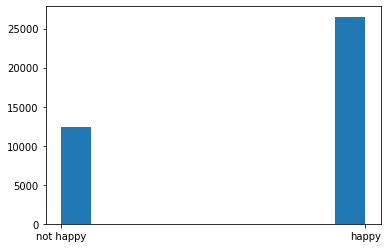

In [4]:
# Распределение классов целевого признака
plt.hist(data['Is_Response'])
plt.show()

### Формирование признаков

In [5]:
# Сформируем общий словарь для обучения моделей из обучающей и тестовой выборки
vocab_list = data['Description'].tolist()
vocab_list[1:3]

["I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerv

In [6]:
vocab_vect = CountVectorizer()
vocab_vect.fit(vocab_list)
corpus_vocab = vocab_vect.vocabulary_
print('Количество сформированных признаков - {}'.format(len(corpus_vocab)))

Количество сформированных признаков - 46016


In [7]:
# Первые 10 признаков
for i in list(corpus_vocab)[0:9]:
    print('{}={}'.format(i, corpus_vocab[i]))

the=40646
room=34587
was=44401
kind=22449
of=27927
clean=7665
but=5772
had=18401
very=43761


### Решение задачи анализа тональности

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data['Description'], data['Is_Response'],
                                                    test_size=0.3, random_state=1)

In [9]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [10]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print_accuracy_score_for_classes(y_test, y_pred)

In [11]:
sentiment(CountVectorizer(), KNeighborsClassifier())

Метка 	 Accuracy
happy 	 0.9407025053506232
not happy 	 0.27535456248327533


In [12]:
sentiment(TfidfVectorizer(), LinearSVC())

Метка 	 Accuracy
happy 	 0.9223215409794788
not happy 	 0.7923468022477923


In [13]:
sentiment(CountVectorizer(), MultinomialNB())

Метка 	 Accuracy
happy 	 0.9143900289563137
not happy 	 0.7511372758897511


In [14]:
sentiment(TfidfVectorizer(), MultinomialNB())

Метка 	 Accuracy
happy 	 0.9925720760417978
not happy 	 0.36954776558736957


In [15]:
sentiment(CountVectorizer(), ComplementNB())

Метка 	 Accuracy
happy 	 0.9035628855596123
not happy 	 0.7647845865667647


In [16]:
sentiment(TfidfVectorizer(), ComplementNB())

Метка 	 Accuracy
happy 	 0.9714213773133576
not happy 	 0.5731870484345731


In [17]:
sentiment(CountVectorizer(binary=True), BernoulliNB())

Метка 	 Accuracy
happy 	 0.857736371647992
not happy 	 0.6165373294086165


In [18]:
sentiment(TfidfVectorizer(binary=True), BernoulliNB())

Метка 	 Accuracy
happy 	 0.857736371647992
not happy 	 0.6165373294086165


На выбранном наборе данных наиболее качественную классификацию осуществили LinearSVC, MultinomialNB и ComplementNB.